With clean data, we can start to compare our dataframes and visualize how air pollution and asthma intersect based on our dataframes. To get a better sense of how to test our hypothesis, we started by importing our data into this new file and creating some simple **diagnostic plots**.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as stats

asthma = pd.read_csv('/Users/delre/group5-project/Datasets/California_Asthma_Data_ADA.csv', header = 4)
aqi2015 = pd.read_csv('/Users/delre/group5-project/Datasets/annual_aqi_by_county_2015.csv')
aqi2016 = pd.read_csv('/Users/delre/group5-project/Datasets/annual_aqi_by_county_2016.csv')

asthmalist = ['County', 'Year', 'Asthma measure', 'Comparison', 'Group',
       'County prevalence', 'County 95% confidence interval',
       'California prevalence', 'California 95% confidence interval']

ca_asthma = asthma[asthmalist]

ca_aqi2015 = aqi2015.loc[aqi2015['State']=='California',:].reset_index(drop=True)
ca_aqi2016 = aqi2016.loc[aqi2016['State']=='California',:].reset_index(drop=True)

ca_aqi = pd.concat([ca_aqi2015, ca_aqi2016], axis = 0)
ca_asthma2015 = ca_asthma.loc[ca_asthma['Year']=='2015–2016',:].reset_index(drop=True)

print(ca_aqi.head())
ca_asthma2015.head()

        State     County  Year  Days with AQI  Good Days  Moderate Days  \
0  California    Alameda  2015            365        214            139   
1  California     Alpine  2015             31          1             14   
2  California     Amador  2015            364        283             73   
3  California      Butte  2015            365        170            182   
4  California  Calaveras  2015            365        245             98   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   12               0                    0   
1                                   13               3                    0   
2                                    8               0                    0   
3                                   12               1                    0   
4                                   18               2                    1   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0 

,County,Year,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,Alameda,2015–2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7–17.9),14.80%,(14.0–15.7)
1,Alpine,2015–2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2–21.1),14.80%,(14.0–15.7)
2,Amador,2015–2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2–21.1),14.80%,(14.0–15.7)
3,Butte,2015–2016,Lifetime asthma prevalence,Total population,All ages,14.70%,(7.8–21.6),14.80%,(14.0–15.7)
4,Calaveras,2015–2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2–21.1),14.80%,(14.0–15.7)


First, we wanted to find out what the best data to compare would be to most best capture the correlative relationship between asthma prevalance and AQI (or lackthereof).

Our intuition was to use the median AQI compare with counties in CA, because we thought the median AQI would likely be an accurate reflection of the county's overall air quality.

We made **scatterplot** to compare median AQI the number of Good Days in a county to ensure this metric would give an accurate estimate of the overall air quality in a county

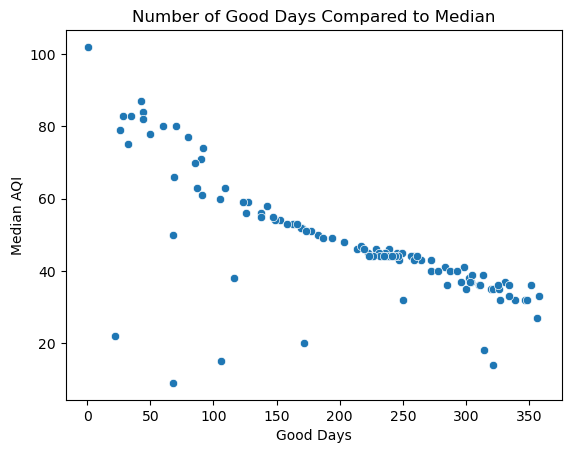

In [29]:
MedianGoodDays = sns.scatterplot(data=ca_aqi, x='Good Days', y='Median AQI')
plt.title('Number of Good Days Compared to Median')
plt.show()

In [30]:
stats.pearsonr(ca_aqi['Good Days'], ca_aqi['Median AQI'])

PearsonRResult(statistic=-0.7413430258037454, pvalue=4.531676569870009e-20)

We can see there is a strong negative correlation between the number of Good Days a county has and its median AQI; this means that the median likely gives an accurate reflection of general air quality based on how many days there are no issues with AQI.

From there, we needed find a way to compare county prevelance from our asthma dataset with median AQI so we could test our hypothesis.

To start, we combined our datasets based on county name

In [48]:
asthmaAQI = pd.merge(ca_aqi, ca_asthma2015, on=['County', 'County'])
asthmaAQI.head()

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015–2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7–17.9),14.80%,(14.0–15.7)
1,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015–2016,Lifetime asthma prevalence,Child vs. adult,0–17 years,18.40%,(6.2–30.6),14.50%,(12.2–16.8)
2,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015–2016,Lifetime asthma prevalence,Child vs. adult,18+ years,13.10%,(9.2–17.0),14.90%,(14.0–15.9)
3,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015–2016,Lifetime asthma prevalence,Age group,0–4 years,Not available,Not available,4.90%,(2.9–7.0)
4,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015–2016,Lifetime asthma prevalence,Age group,5–17 years,24.10%,(5.9–42.2),18.20%,(15.2–21.2)


With our combined dataframes, we could start to visualize the relationship between median AQI and county prevalence.

We started with a scatterplot and checking the R and P values of the data.

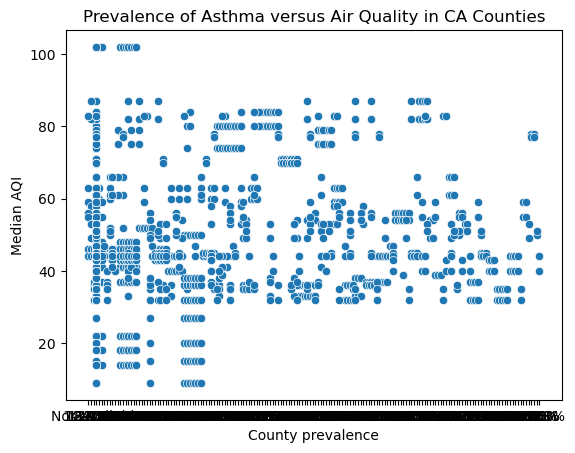

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

In [53]:
#Need to separate age groups!!!

asthmaAQI_scatterplot = sns.scatterplot(data=asthmaAQI, x='County prevalence', y='Median AQI')
plt.title('Prevalence of Asthma versus Air Quality in CA Counties')
plt.show()

stats.pearsonr(asthmaAQI['Median AQI'], asthmaAQI['County prevalence'])

A heatmap allowed us to visualize more than just median AQI: